# TRAINING AND TESTING

Training and Testing Data
=====================================
To evaluate how well our supervised models generalize, we can split our data into a training and a test set:

<img src="figures/train_test_split.svg" width="100%">


In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


In [5]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[0 1 1 2 2 2 0 2 2 1 1 2 2 1 1 1 1 1 0 2 2 2 1 0 2 1 1 2 1 0 2 2 0 2 2 0 2
 1 0 2 0 2 2 2 0 2 0 0 1 0 1 0 2 1 1 0 1 2 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 2]
[1 0 1 2 2 1 1 0 1 0 0 2 2 2 1 0 2 0 2 1 0 0 0 2 1 1 1 1 1 0 2 2 2 2 0 1 0
 1 2 1 2 2 1 2 2 1 0 2 0 2 1 2 0 0 2 0 2 1 2 1 0 1 0 1 0 2 2 0 0 0 1 0 1 0
 1]


In [6]:
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print("Fraction Correct")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction Correct
0.96


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 25
 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73 74]
[24 38 72]


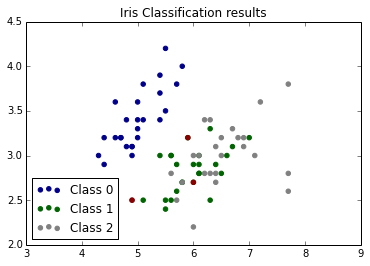

In [8]:
# Plot two dimensions
colors = ["darkblue", "darkgreen", "gray"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 0], test_X[idx, 1], color=color, label="Class %s" % str(n))
plt.scatter(test_X[incorrect_idx, 0], test_X[incorrect_idx, 1], color="darkred")
# Make xlim larger to accommodate legend
plt.xlim(3, 9)
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

# TAKE HOME MESSAGE
* overlap is errorness for the algorithm
* we need to add features that seperate data
* this should improve classifier performance